<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000 

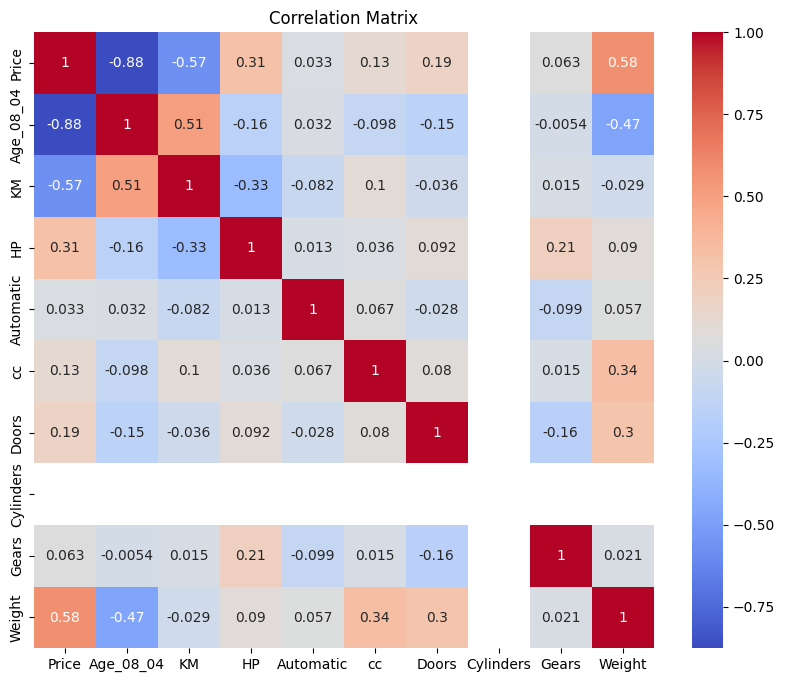

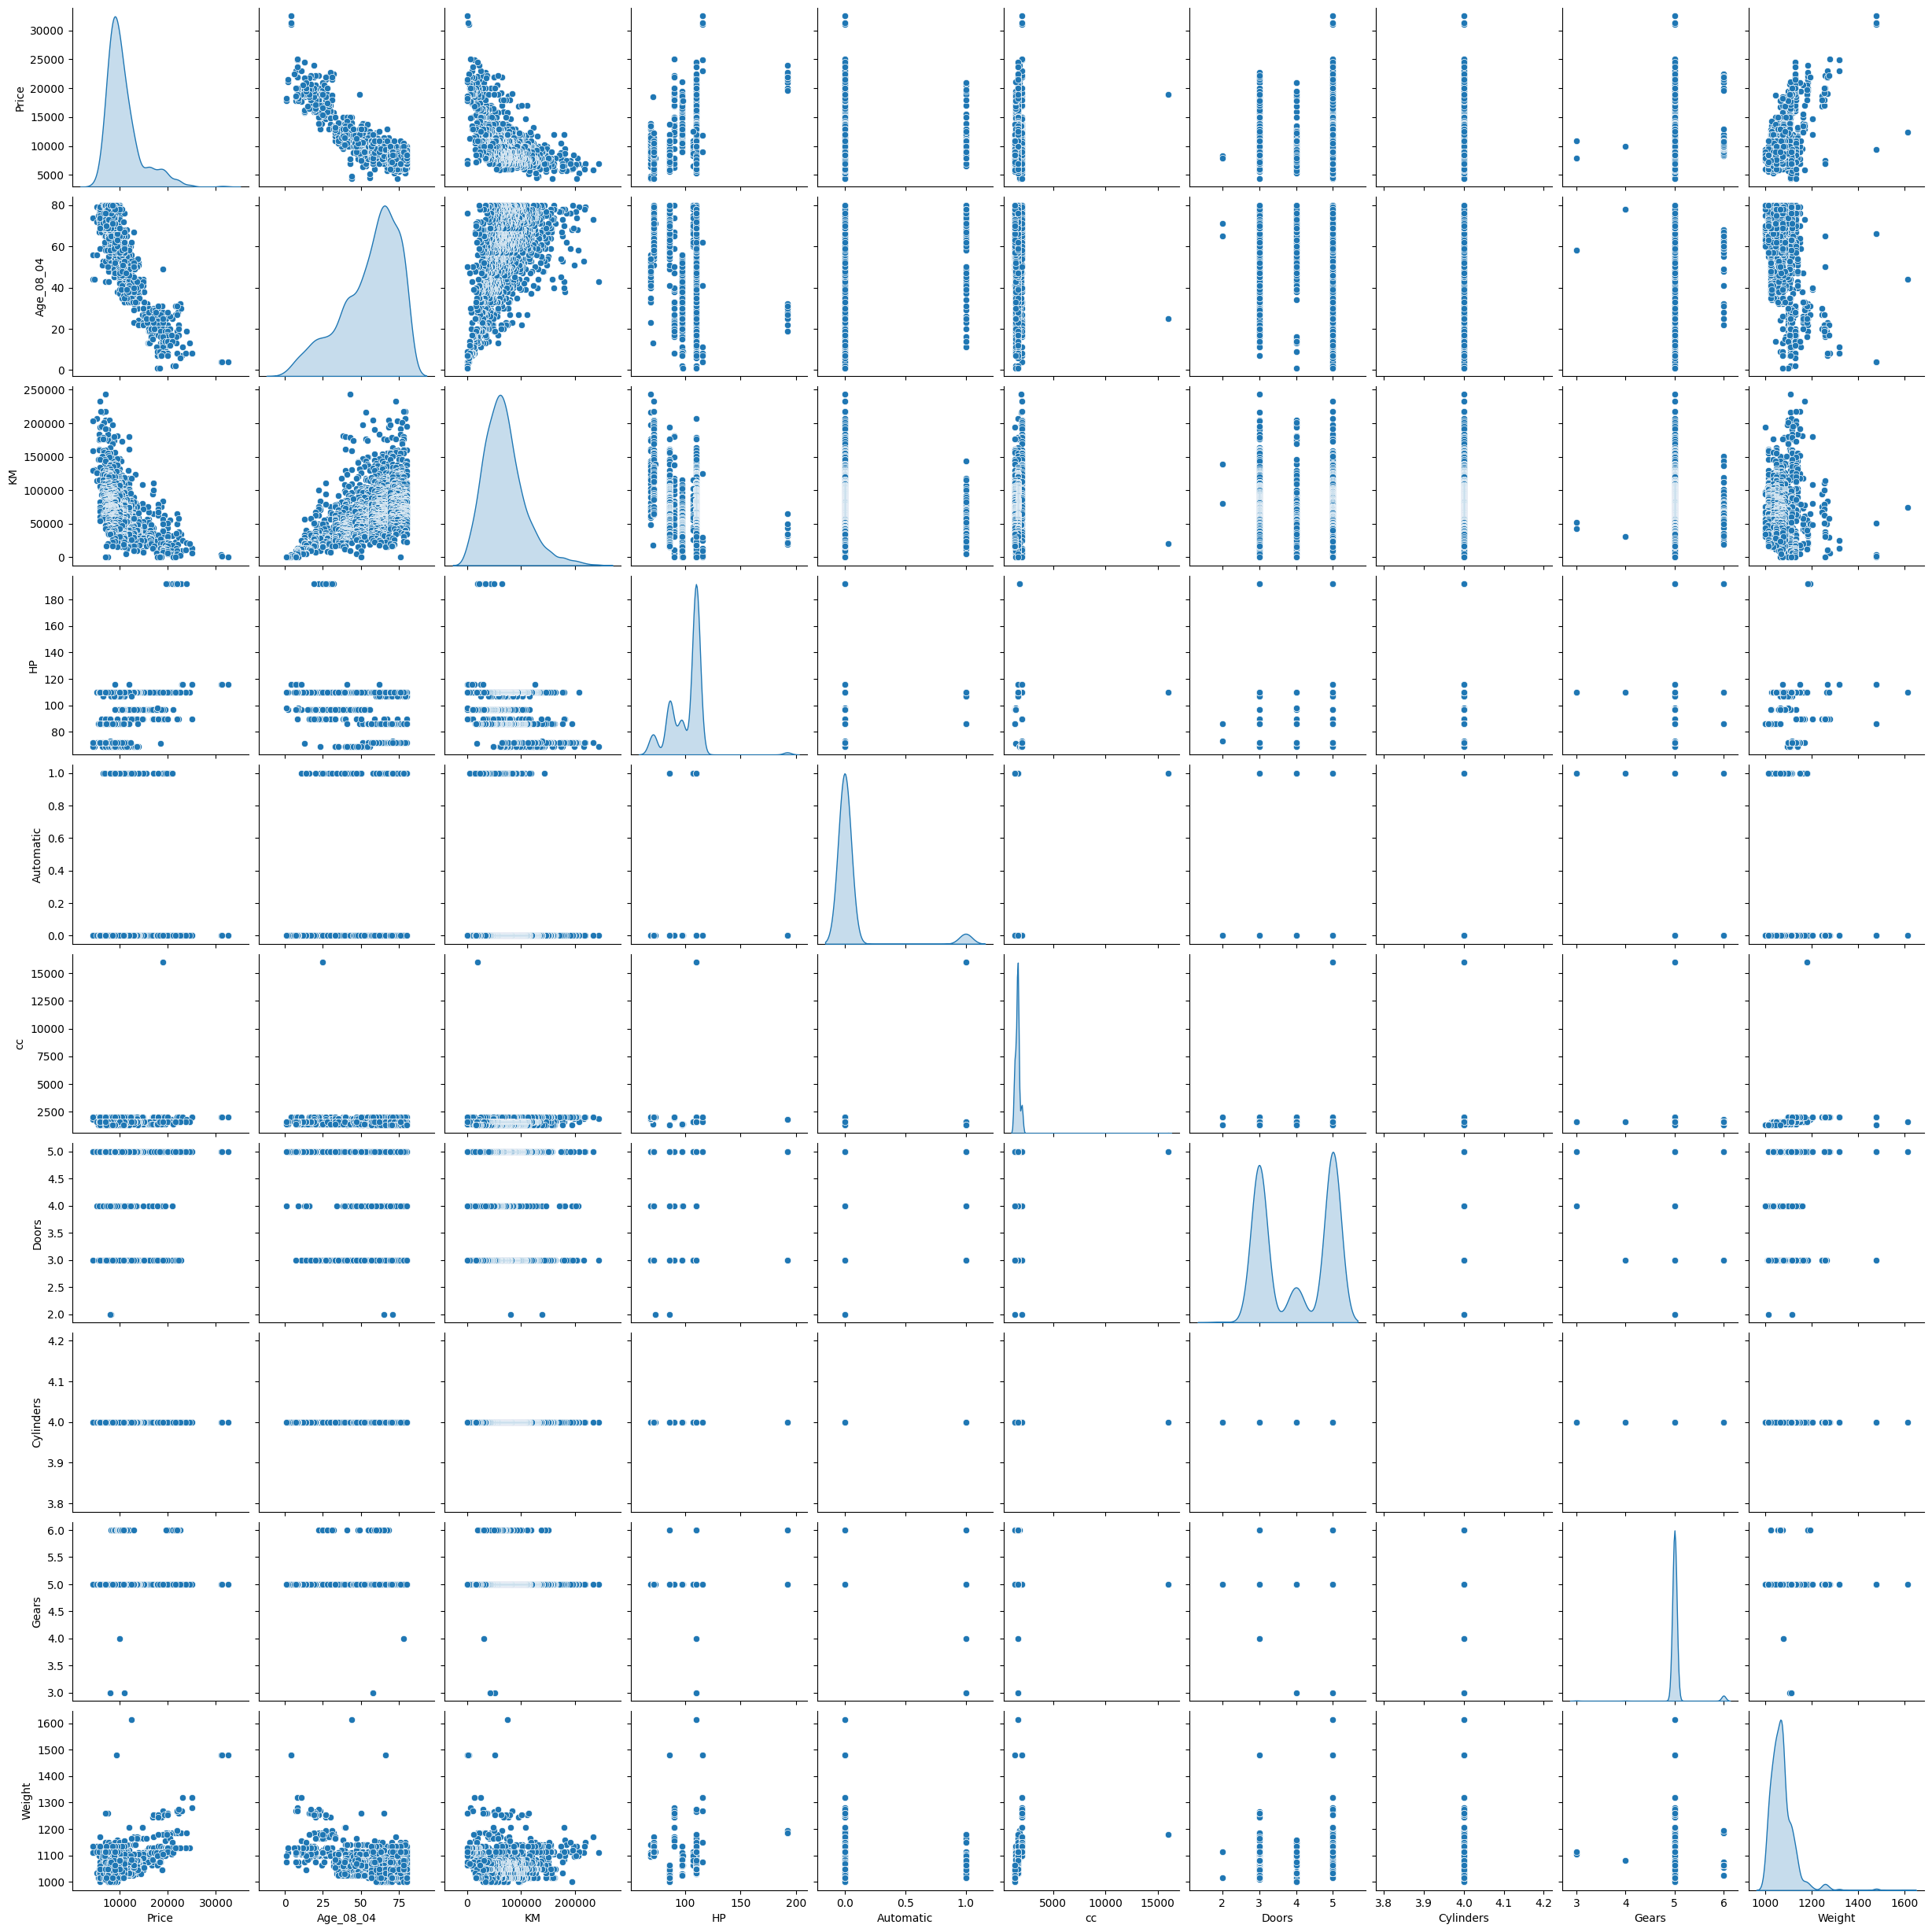

Missing Values:
 Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
data_path = "/content/ToyotaCorolla - MLR.csv"
df = pd.read_csv(data_path)
print(df.info())
print(df.describe())

# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Pairplot for visualizing relationships
sns.pairplot(numeric_df, diag_kind="kde")
plt.show()

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

In [ ]:
# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=["Fuel_Type"], drop_first=True)
# Splitting data into features and target
X = df.drop(columns=["Price"])
y = df["Price"]
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")

Training set size: (1148, 11), Testing set size: (288, 11)


In [ ]:
# Standardization
scaler = StandardScaler()
#Multiple Linear Regression
lr = LinearRegression()
pipeline_lr = Pipeline(steps=[("scaler", scaler), ("model", lr)])
pipeline_lr.fit(X_train, y_train)
# Lasso Model
lasso = Lasso(alpha=0.1)
pipeline_lasso = Pipeline(steps=[("scaler", scaler), ("model", lasso)])
pipeline_lasso.fit(X_train, y_train)
# Ridge Model
ridge = Ridge(alpha=0.1)
pipeline_ridge = Pipeline(steps=[("scaler", scaler), ("model", ridge)])
pipeline_ridge.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('model', Ridge(alpha=0.1))])

In [ ]:
# Evaluate models
models = [("Linear Regression", pipeline_lr),
          ("Lasso", pipeline_lasso),
          ("Ridge", pipeline_ridge)]

for name, model in models:
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"{name}:\n R^2: {r2:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}\n")


Linear Regression:
 R^2: 0.83, MSE: 2203043.82, RMSE: 1484.27

Lasso:
 R^2: 0.83, MSE: 2202739.48, RMSE: 1484.16

Ridge:
 R^2: 0.83, MSE: 2202832.14, RMSE: 1484.19



In [ ]:
# Display Lasso and Ridge Coefficients
lasso_coefs = pipeline_lasso.named_steps["model"].coef_
ridge_coefs = pipeline_ridge.named_steps["model"].coef_

print("Lasso Coefficients:", lasso_coefs)
print("Ridge Coefficients:", ridge_coefs)


Lasso Coefficients: [-2267.27035325  -611.71048543   208.46018035    34.33563064
   -14.04428476   -57.28823708     0.           109.26803766
  1316.40520977   -21.48431939   457.89124117]
Ridge Coefficients: [-2267.06503988  -611.82579612   208.46639592    34.41377811
   -14.1474058    -57.38464168     0.           109.35062306
  1316.58315783   -21.81553958   457.6320413 ]
